In [48]:
import numpy as np 
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

## Fuzzy Variables

In [49]:
temperature = ctrl.Antecedent(np.arange(0,101,1),'temperature')
humidity = ctrl.Antecedent(np.arange(0,101,1),'humidty')
fan_speed = ctrl.Consequent(np.arange(0,101,1),'fan_speed')

## Membership Functions

In [50]:
temperature['cold'] = fuzz.trimf(temperature.universe,[0,0,50])
temperature['medium'] = fuzz.trimf(temperature.universe,[20,50,80])
temperature['hot'] = fuzz.trimf(temperature.universe,[50,100,100])



## Triangular Membership Function
- A triangular membership function is defined by three parameters: the left foot (a), the peak (b), and the right foot (c).
- The triangular membership function is defined as follows:
- If x ≤ a or x ≥ c, then μ(x) = 0.
- If a < x ≤ b, then μ(x) = (x - a) / (b - a).
- If b < x < c, then μ(x) = (c - x) / (c - b).
- The triangular membership function is symmetric if b = (a + c) / 2.

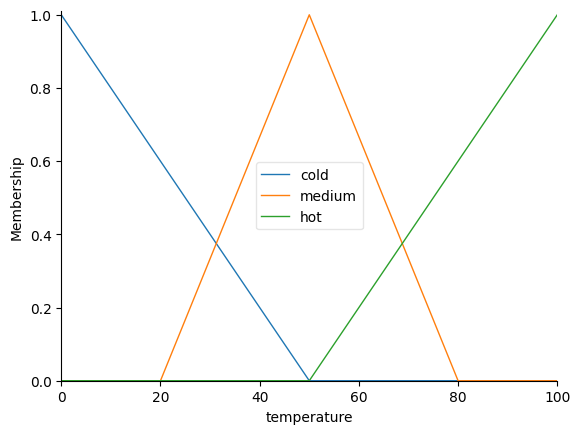

In [51]:
temperature.view()

Low Temperature starts at 0, peaks at 0 and declines to null at 50
High Temperature starts at 50, peaks at 100 and declines to null at 100
Medium Temperature starts at 20, peaks at 50 and declines to null at 80

In [52]:
humidity['dry'] = fuzz.trimf(humidity.universe,[0,0,50])
humidity['normal'] = fuzz.trimf(humidity.universe,[20,50,80])
humidity['humid'] = fuzz.trimf(humidity.universe,[50,100,100])

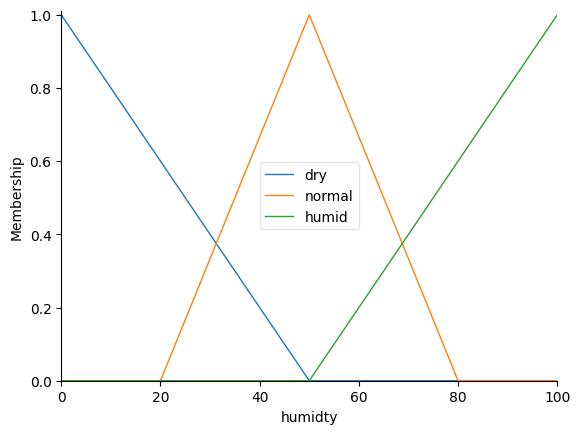

In [53]:
humidity.view()

In [54]:
fan_speed['low'] = fuzz.trimf(fan_speed.universe,[0,0,50])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe,[20,50,80])
fan_speed['high'] = fuzz.trimf(fan_speed.universe,[50,100,100])


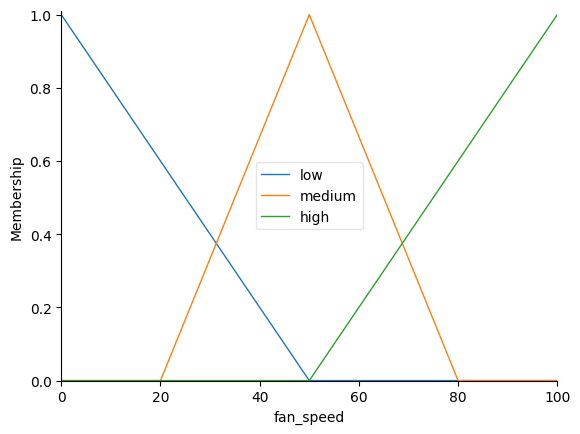

In [55]:
fan_speed.view()

## Fuzzy Rules

In [56]:
rule1 = ctrl.Rule(temperature['cold'] | humidity['dry'] , fan_speed['low'])

rule2 = ctrl.Rule(temperature['medium'] | humidity['normal'] , fan_speed['medium'])

rule3 = ctrl.Rule(temperature['hot'] | humidity['humid'] , fan_speed['high'])

## Create the FIS

In [57]:
fis = ctrl.ControlSystem([rule1,rule2,rule3])
fan_speed_ctrl = ctrl.ControlSystemSimulation(fis)


## Pass inputs to the FIS and compute the output

In [58]:
fan_speed_ctrl.input['temperature'] = 75
fan_speed_ctrl.input['humidity'] = 40
fan_speed_ctrl.compute()

ValueError: Unexpected input: humidity

In [ ]:
print("Fan speed: ", fan_speed_ctrl.output['fan_speed'])